# Exercise 3: Finite Difference Method


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
At depth 10000 the error is:
Error mean: 0.2529618599973736
Error maximum: 0.40143359443842996
Error minimum: 0.0


Text(0.5, 1.0, 'Recursive Error')

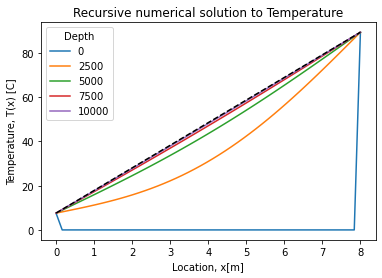

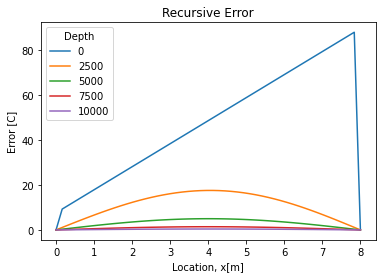

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# You entered as seed for the random number generator: 111841118511186
# The temperature (in degree Celsius) on the left extreme of the bar (x=0) is: 7.6
# The temperature (in degree Celsius) on the right extreme of the bar (x=L) is: 89.4
# The total length of the metallic bar (in meters) is: 8

# CONSTANTS ========================================================================
x0 = 8    #m
N = 100 #number of points we're considering
Tr = 89.4 #C
Tl = 7.6  #C
depth = 10000 #MAX recursive calls before error is thrown.
modulo_depth = depth/4

#INITIAL CONDITIONS
T = np.zeros((N,)) #1d line of temperature, all zeroes
T[-1] = Tr # rightmost boundary
T[0] = Tl  # leftmost boundary
#The _bar_
x = np.linspace(0, x0, N)

#setting recursion stuff, so this can work
recursion_limit = 20000
sys.setrecursionlimit(recursion_limit) 
#^ This breaks my VSCode setup. See results at bottom for more details.
# FUNCTIONS ========================================================================

def recursive_temperature(depthi, Tinitial):
    ''' recursively walks over the bar and numerically solves it to a specified number of calls (depth)

    Keyword Arguments:
        depthi  -- recursion depth to go to
        Tinitial-- A tuple containing the initial temperature array and a list of other temperature arrays (empty)
    returns:
        tuple -- returns tuple of final temperature array and list of all the interim temperature arrays
    '''
    if (depthi == 0):
        Tinitial[1].append((Tinitial[0], depth))
        return Tinitial #BASE CASE
    #print('Recursion number', abs(iteration - iterations))
    T = Tinitial[0] #it's a tuple
    Tnegi  = T[0:-2] #Gets the interior values
    Tplusi = T[2:]
    T = (Tnegi + Tplusi)/2
    T = np.append(T, Tr) #Adds back in boundary values
    T = np.append(Tl, T)
    if (depthi % modulo_depth == 0):
        Tinitial[1].append((T, abs(depthi-depth))) #Get some graphs going
    return recursive_temperature(depthi-1, (T, Tinitial[1])) #Recursion

# RESULTS ==========================================================================

T_analytical = np.linspace(Tl, Tr, N) #Analytical solution of T=ax+b

T_recursive_full = recursive_temperature(depth, (T, []))[1] # Recursive call, list because of return style
T_recursive = T_recursive_full[-1][0] #get the last entry and its T-array
#Recursive graphing
fig, ax = plt.subplots() #setting up since we're looping over this
for T_rec in T_recursive_full:
    ax.plot(x, T_rec[0], label=str(T_rec[1]))
ax.set_xlabel('Location, x[m]')
ax.set_ylabel('Temperature, T(x) [C]')
ax.set_title('Recursive numerical solution to Temperature')
ax.legend(title='Depth')
ax.plot(x, T_analytical, linestyle='dashed', color='black')


# ERROR ANALYSIS =====================================================================
fig3, ax3 = plt.subplots()
for T_rec in T_recursive_full:
    error_recursive = abs(T_rec[0]-T_analytical)
    ax3.plot(x, error_recursive, label=str(T_rec[1]))
print('At depth', depth, 'the error is:')
print('Error mean:', error_recursive.mean())
print('Error maximum:', error_recursive.max())
print('Error minimum:', error_recursive.min())

ax3.set_xlabel('Location, x[m]')
ax3.set_ylabel('Error [C]')
ax3.legend(title='Depth')
ax3.set_title('Recursive Error')
#print(sys.getrecursionlimit())

# Results
As seen above, as the depth of the recursion increases, similarly to an iterative process, the amount of error decreases as the function eventually converges to the analytical solution. One thing to note about the functions above is that they work in Google Colab but not on my local PC; they break my python kernel. If this is happening to you, try running it in Colab or on Syzygy. This is due to the recursion limit and something weird in my setup (VSCode + jupyter is, honestly, not good. I miss emacs.)

The seed used was 111841118511186 which is just a set of gibberish numbers with no reference to anything.
This resulted in the initial values of

 The temperature (in degree Celsius) on the left extreme of the bar (x=0) is: 7.6

 The temperature (in degree Celsius) on the right extreme of the bar (x=L) is: 89.4

 The total length of the metallic bar (in meters) is: 8